# London Data - Part 1: Numbers

This is a supplement to my article about rental prices in London, in which I scraped the web for a bunch of data to play around with.

### The data

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.stretch"] = 'expanded'
plt.rcParams["font.weight"] = 'medium'
plt.axes.linewidth = 2

df = pd.read_json('data.json')
print('Shape of the data: ', df.shape)  # .json file contains > 27,000 listings each with 38 data points
print('\nThere are many things we could start looking into with this...\n')
df.head(3)

Shape of the data:  (27843, 38)

There are many things we could start looking into with this...



,ID,advertiser,average_rent,balcony_patio,benefits,bills_included,broadband,couples,deposit,description,...,parking,pets,postcode,property_type,references,room_no,smokers,suburb,title,train_distance
0,9341566,agent,600.0,No,No,Yes,Yes,No,0,\n ***NO ADMIN FEES***Come ...,...,Yes,No,SE2,house,Yes,5,Yes,Abbey Wood,Newly Refurbished HouseShare - Great Transport!,5.0
1,3933359,live out landlord,550.0,No,No,Yes,No,No,550,\n A GOOD SIZE DOUBLE ROOM ...,...,Yes,No,SE2,house,No,4,Yes,Abbey Wood,Master Bedroom Available - Bills Inclusive,5.0
2,9089446,agent,440.0,Yes,No,Yes,Yes,No,420,\n Your search for the idea...,...,No,No,SE2,flat,Yes,4,No,Abbey Wood,Double Room close to Abbey Wood Train Station!,5.0


### The basics

/Users/cal_lamont/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


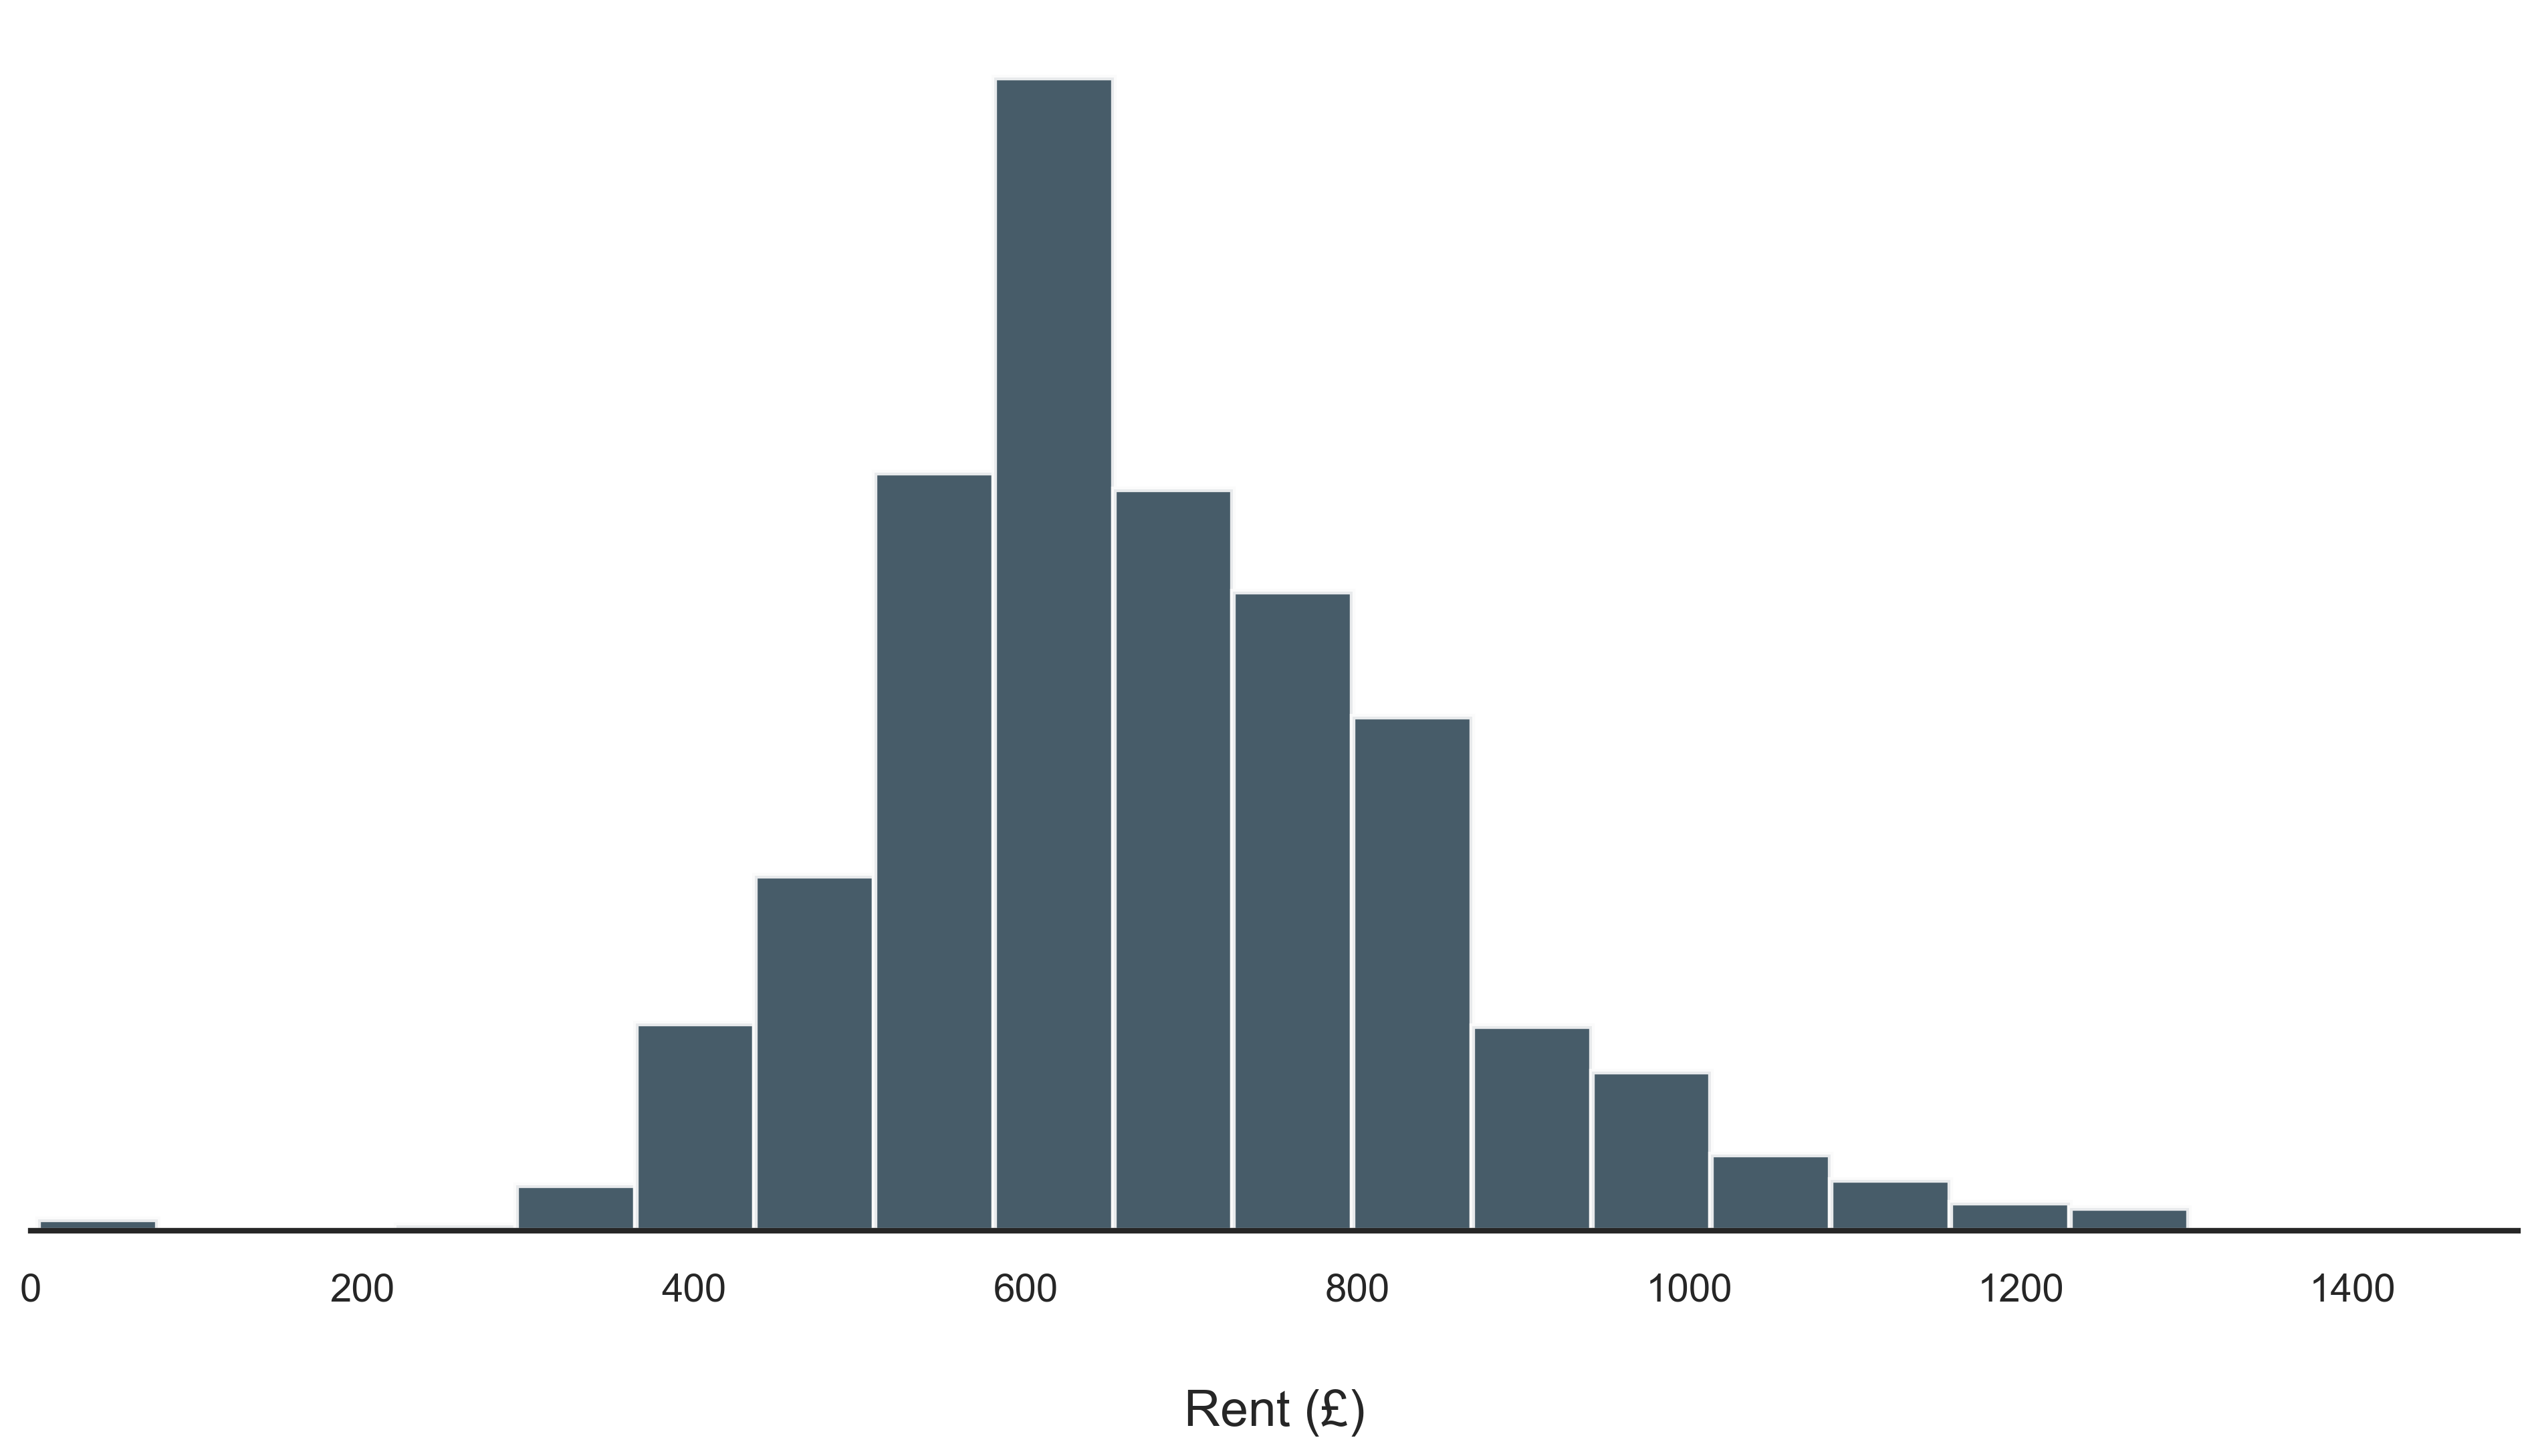

In [7]:
# What is the average rent of the.. average rent of the listings.
# (Some listings had multiple rooms advertised)
ave_rent = df['average_rent'].mean()
med_rent = df['average_rent'].median()

df_cheap = df[df['average_rent']<3000].dropna()  # Ignore expensive flats skewing the data

fig,ax = plt.subplots(figsize=(16,8), dpi=300)
sns.distplot(df_cheap['average_rent'], color = (0.2,0.29,0.35), ax=ax, kde=False, bins=30, hist_kws=dict(alpha=0.9, edgecolor=(0.984,0.984,0.984), linewidth=2))

ax.set_xlabel('Rent (£)', fontsize=18)
ax.tick_params(labelsize=14)
ax.xaxis.set_label_coords(0.5, -0.13)
plt.gca().axes.tick_params(pad=15)
ax.spines['bottom'].set_linewidth(2)
ax.set_xlim(0,1500)

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)